In [0]:
from sklearn import datasets
import tensorflow as tf
import pandas as pd
import numpy as np 

In [0]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names )
data['target'] = pd.DataFrame(iris.target)

In [3]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
data['target'].tail()

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int64

In [0]:
df_train = data.iloc[:,0:4].copy() 
df_labels = data.iloc[:,4:5].copy()

In [0]:
def labelMaker(val):
    if val == 0:
        return [1, 0, 0]
    elif val == 1:
        return [0, 1, 0]
    else: 
        return [0, 0, 1]

In [0]:
df_train=df_train.values
df_labels = df_labels.values

In [0]:
df_labels = np.array([labelMaker(i[0]) for i in df_labels])

In [9]:
print(df_train[[0]])
print(df_labels.shape)

[[5.1 3.5 1.4 0.2]]
(150, 3)


In [10]:
print(df_train[0].shape,df_labels.shape)

(4,) (150, 3)


#Defining the TensorFlow model


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=df_train[0].shape),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
]
)
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
history = model.fit(df_train,df_labels,epochs=10,verbose=False)

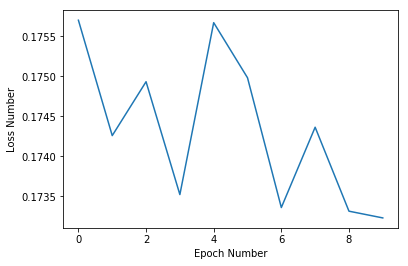

In [19]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Loss Number')
plt.plot(history.history['loss'])
plt.show()

In [14]:
res = model.predict([[[6.7,3.0,5.2,2.3]]])
print((res))
print((np.argmax(res)))

[[7.6390684e-02 1.1923165e-05 9.2359734e-01]]
2


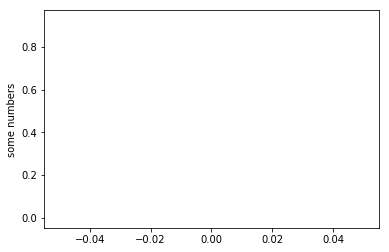

In [15]:
import matplotlib.pyplot as plt

plt.plot(res)
plt.ylabel('some numbers')
plt.show()